In [81]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
%matplotlib inline
Data_location = '/Users/behnam/Documents/Projects_Data/Q_Heat_Engine/'

In [52]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})


In [53]:
cut = 80
c = tensor(sigmam(),identity(cut))
a = tensor(identity(2),destroy(cut))

x100 =np.load(Data_location + 'Operators/x100.npy')
X = x100[:cut,:cut]
X = Qobj(X)
X = tensor(identity(2),X)

In [145]:
gamma_list = np.arange(0.0,4.0,0.2)
R_list = np.arange(3.0,11.0)
t_list = np.arange(1.0,11.0,2.0)
glen = len(gamma_list); Rlen = len(R_list); tlen =  len(t_list)

x = np.empty([glen,Rlen,tlen]); std_x = np.empty([glen,Rlen,tlen])
N = np.empty([glen,Rlen,tlen]); std_N = np.empty([glen,Rlen,tlen])
ne= np.empty([glen,Rlen,tlen]); std_ne  = np.empty([glen,Rlen,tlen])

gcounter=0
for g in gamma_list:
    Rcounter=0
    for R in R_list:
        tcounter=0
        for t in t_list:
            SS = qload(Data_location + 'SS/Steady_State_Half_cut_80_gamma_' + str(g) 
                                     + '_kappa_0.1_t_'+ str(t) 
                                     + '_Ts_1.0_Td_0.0_L_5.0_R_' + str(R))
            
            x_temp   = expect(X,SS)
            N_temp   = expect(a.dag()*a,SS)
            ne_temp  = expect(c.dag()*c,SS)
            
            x[gcounter,Rcounter,tcounter]   = x_temp
            N[gcounter,Rcounter,tcounter]   = N_temp
            ne[gcounter,Rcounter,tcounter]  = ne_temp
            
            xsq = expect(X*X,SS)
            Nsq = expect(a.dag()*a*a.dag()*a,SS)
            nesq= expect(c.dag()*c*c.dag()*c,SS)
            
            std_x[gcounter,Rcounter,tcounter] = np.sqrt(xsq - x_temp**2)
            std_N[gcounter,Rcounter,tcounter] = np.sqrt(Nsq - N_temp**2)
            std_ne[gcounter,Rcounter,tcounter]= np.sqrt(nesq - ne_temp**2)
            
            tcounter += 1
            
        Rcounter += 1
    
    gcounter +=1

Loaded Qobj object:
Quantum object: dims = [[2, 80], [2, 80]], shape = (160, 160), type = oper, isHerm = True

Loaded Qobj object:
Quantum object: dims = [[2, 80], [2, 80]], shape = (160, 160), type = oper, isHerm = True

Loaded Qobj object:
Quantum object: dims = [[2, 80], [2, 80]], shape = (160, 160), type = oper, isHerm = True

Loaded Qobj object:
Quantum object: dims = [[2, 80], [2, 80]], shape = (160, 160), type = oper, isHerm = True

Loaded Qobj object:
Quantum object: dims = [[2, 80], [2, 80]], shape = (160, 160), type = oper, isHerm = True

Loaded Qobj object:
Quantum object: dims = [[2, 80], [2, 80]], shape = (160, 160), type = oper, isHerm = True

Loaded Qobj object:
Quantum object: dims = [[2, 80], [2, 80]], shape = (160, 160), type = oper, isHerm = True

Loaded Qobj object:
Quantum object: dims = [[2, 80], [2, 80]], shape = (160, 160), type = oper, isHerm = True

Loaded Qobj object:
Quantum object: dims = [[2, 80], [2, 80]], shape = (160, 160), type = oper, isHerm = True

L

3.0
10.0
7.0


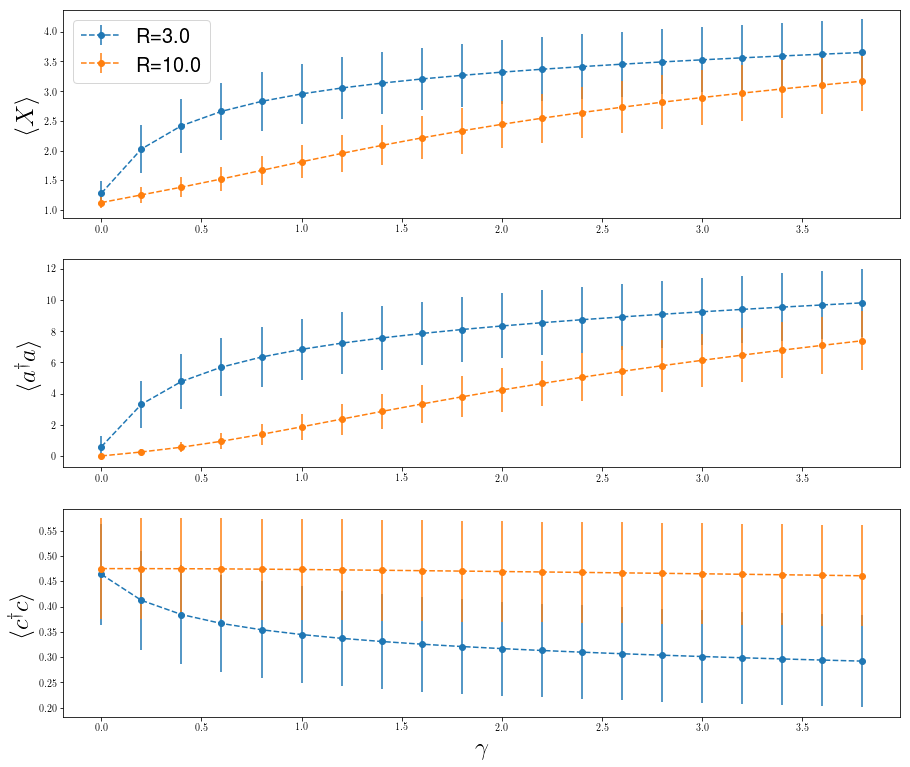

In [177]:
plt.figure(figsize=[15,13])

Rindex1 = 0
Rindex2 = 7
tindex = 3

print(R_list[Rindex1])
print(R_list[Rindex2])
print(t_list[tindex])
plt.subplot(311)
plt.errorbar(gamma_list,x[:,Rindex1,tindex],std_x[:,Rindex1,tindex]/5,ls='--',marker='o',label='R='+str(R_list[Rindex1]))
plt.errorbar(gamma_list,x[:,Rindex2,tindex],std_x[:,Rindex2,tindex]/5,ls='--',marker='o',label='R='+str(R_list[Rindex2]))
plt.ylabel(r'$\langle X \rangle$',fontsize=25)
plt.legend(loc=2,fontsize=20)

plt.subplot(312)
plt.errorbar(gamma_list,N[:,Rindex1,tindex],std_N[:,Rindex1,tindex]/5,ls='--',marker='o')
plt.errorbar(gamma_list,N[:,Rindex2,tindex],std_N[:,Rindex2,tindex]/5,ls='--',marker='o')
#plt.ylim([-0,10])
plt.ylabel(r'$\langle a^\dagger a \rangle$',fontsize=25)

plt.subplot(313)
plt.errorbar(gamma_list,ne[:,Rindex1,tindex],std_ne[:,Rindex1,tindex]/5,ls='--',marker='o')
plt.errorbar(gamma_list,ne[:,Rindex2,tindex],std_ne[:,Rindex2,tindex]/5,ls='--',marker='o')
plt.ylabel(r'$\langle c^\dagger c \rangle$',fontsize=25)
plt.xlabel(r'$\gamma$',fontsize=25)

In [86]:
expect(a.dag()*a*a.dag()*a,SS)

22.704420230958384